# Solar Energy Data Analysis
# --------------------------

# ## Introduction
# This notebook performs Exploratory Data Analysis (EDA) on solar energy data. 
# We will cover the following steps:
# 1. Load and clean the data.
# 2. Perform summary statistics.
# 3. Check data quality (missing values, outliers, incorrect entries).
# 4. Conduct time series analysis.
# 5. Explore correlations between variables.
# 6. Analyze wind data and temperature.
# 7. Visualize data distributions and relationships.
# 8. Clean data based on initial findings.

# ## 1. Load and Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['Timestamp'])
    return data
data = load_data('../data/benin-malanville.csv')
print(data.head())


            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [2]:
def handle_missing_values(df):
    df = df.ffill()
    df.fillna(df.median(), inplace=True)
    return df
# Handle missing values
df = handle_missing_values(data)

In [3]:

def handle_negative_values(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: np.nan if x < 0 else x)  
    # Re-apply missing value handling to take care of new NaNs
    df = handle_missing_values(df) 
    return df
# Handle negative values for specific columns
df = handle_negative_values(df, ['GHI', 'DNI', 'DHI'])

# ## 2. Summary Statistics
# 
# Summary statistics provide an overview of the distribution of the data.

# Summary statistics

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [5]:
print(data.describe())

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000    

In [6]:

# Replace negative values in each column
data['GHI'] = data['GHI'].clip(lower=0)
data['DNI'] = data['DNI'].clip(lower=0)
data['DHI'] = data['DHI'].clip(lower=0)
data['WS'] = data['WS'].clip(lower=0)
data['Tamb'] = data['Tamb'].where(data['Tamb'] >= 0, 200)  # Replace with minimum system temperature
data['RH'] = data['RH'].clip(lower=0, upper=100)
data['Precipitation'] = data['Precipitation'].clip(lower=0)
data['Cleaning'] = data['Cleaning'].apply(lambda x: max(x, 0))  # Replace with nearest positive integer
data['Comments'] = data['Comments'].apply(lambda x: 0.01 if x < 0 else x)
data.drop('Comments', axis=1, inplace=True)
print(data.describe())


                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     241.958821     167.441866   
min              2021-08-09 00:01:00       0.000000       0.000000   
25%              2021-11-08 06:00:45       0.000000       0.000000   
50%              2022-02-07 12:00:30       1.800000       0.000000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     330.101787     261.547532   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.993033     236.589496     228.883576      28.179683   
min         0.000000       0.000000       0.000000      11.000000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         1.600000    

In [7]:
# ## 3. Data Quality Check
# 
# Check for missing values, negative values, and outliers in the dataset.

# Check for missing values and negative values

# ## 3. Data Quality Check
# 
# Check for missing values, negative values, and outliers in the dataset.

# Check for missing values and negative values

            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3  


C:\Users\hp\AppData\Local\Temp\ipykernel_11100\2641699114.py:52: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


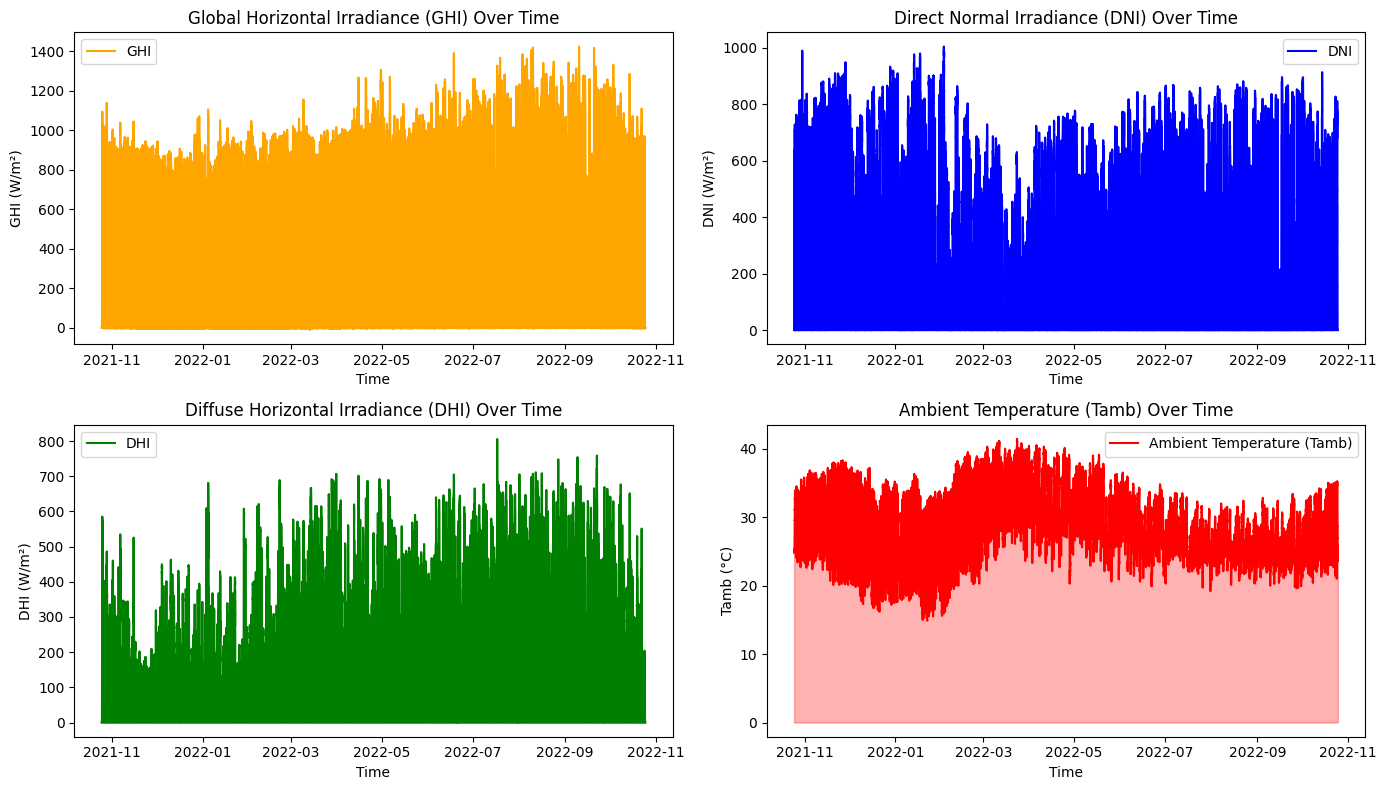

In [8]:
# Convert Timestamp to datetime
# Print the column names to check for the correct spelling and existence of 'Timestamp'
import matplotlib.pyplot as plt

def load_data(file_path):
    data = pd.read_csv(file_path)
    return data
df = load_data('../data/togo-dapaong_qc.csv')
print(data.head())

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as the index for time series analysis
df.set_index('Timestamp', inplace=True)

# Plotting the time series data
plt.figure(figsize=(14, 8))

# Plot GHI, DNI, DHI, and Tamb over time
plt.subplot(2, 2, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='orange')
plt.fill_between(df.index, df['GHI'], color='orange', alpha=0.3)
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='blue')
plt.fill_between(df.index, df['DNI'], color='blue', alpha=0.3)
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Time')
plt.ylabel('DNI (W/m²)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.fill_between(df.index, df['DHI'], color='green', alpha=0.3)
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Time')
plt.ylabel('DHI (W/m²)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df['Tamb'], label='Ambient Temperature (Tamb)', color='red')
plt.fill_between(df.index, df['Tamb'], color='red', alpha=0.3)
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Time')
plt.ylabel('Tamb (°C)')
plt.legend()

plt.tight_layout()
plt.show()


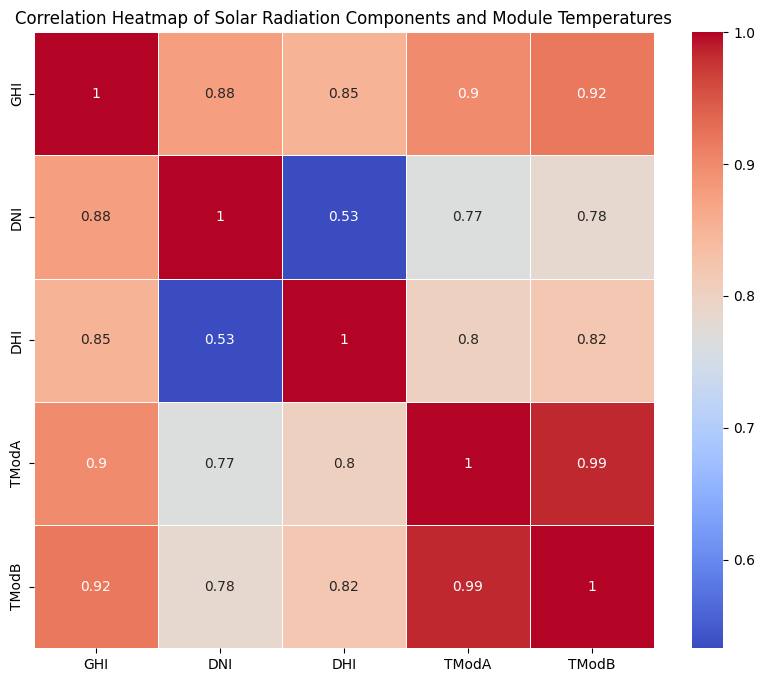

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Calculate the correlation matrix
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation Components and Module Temperatures')
plt.show()


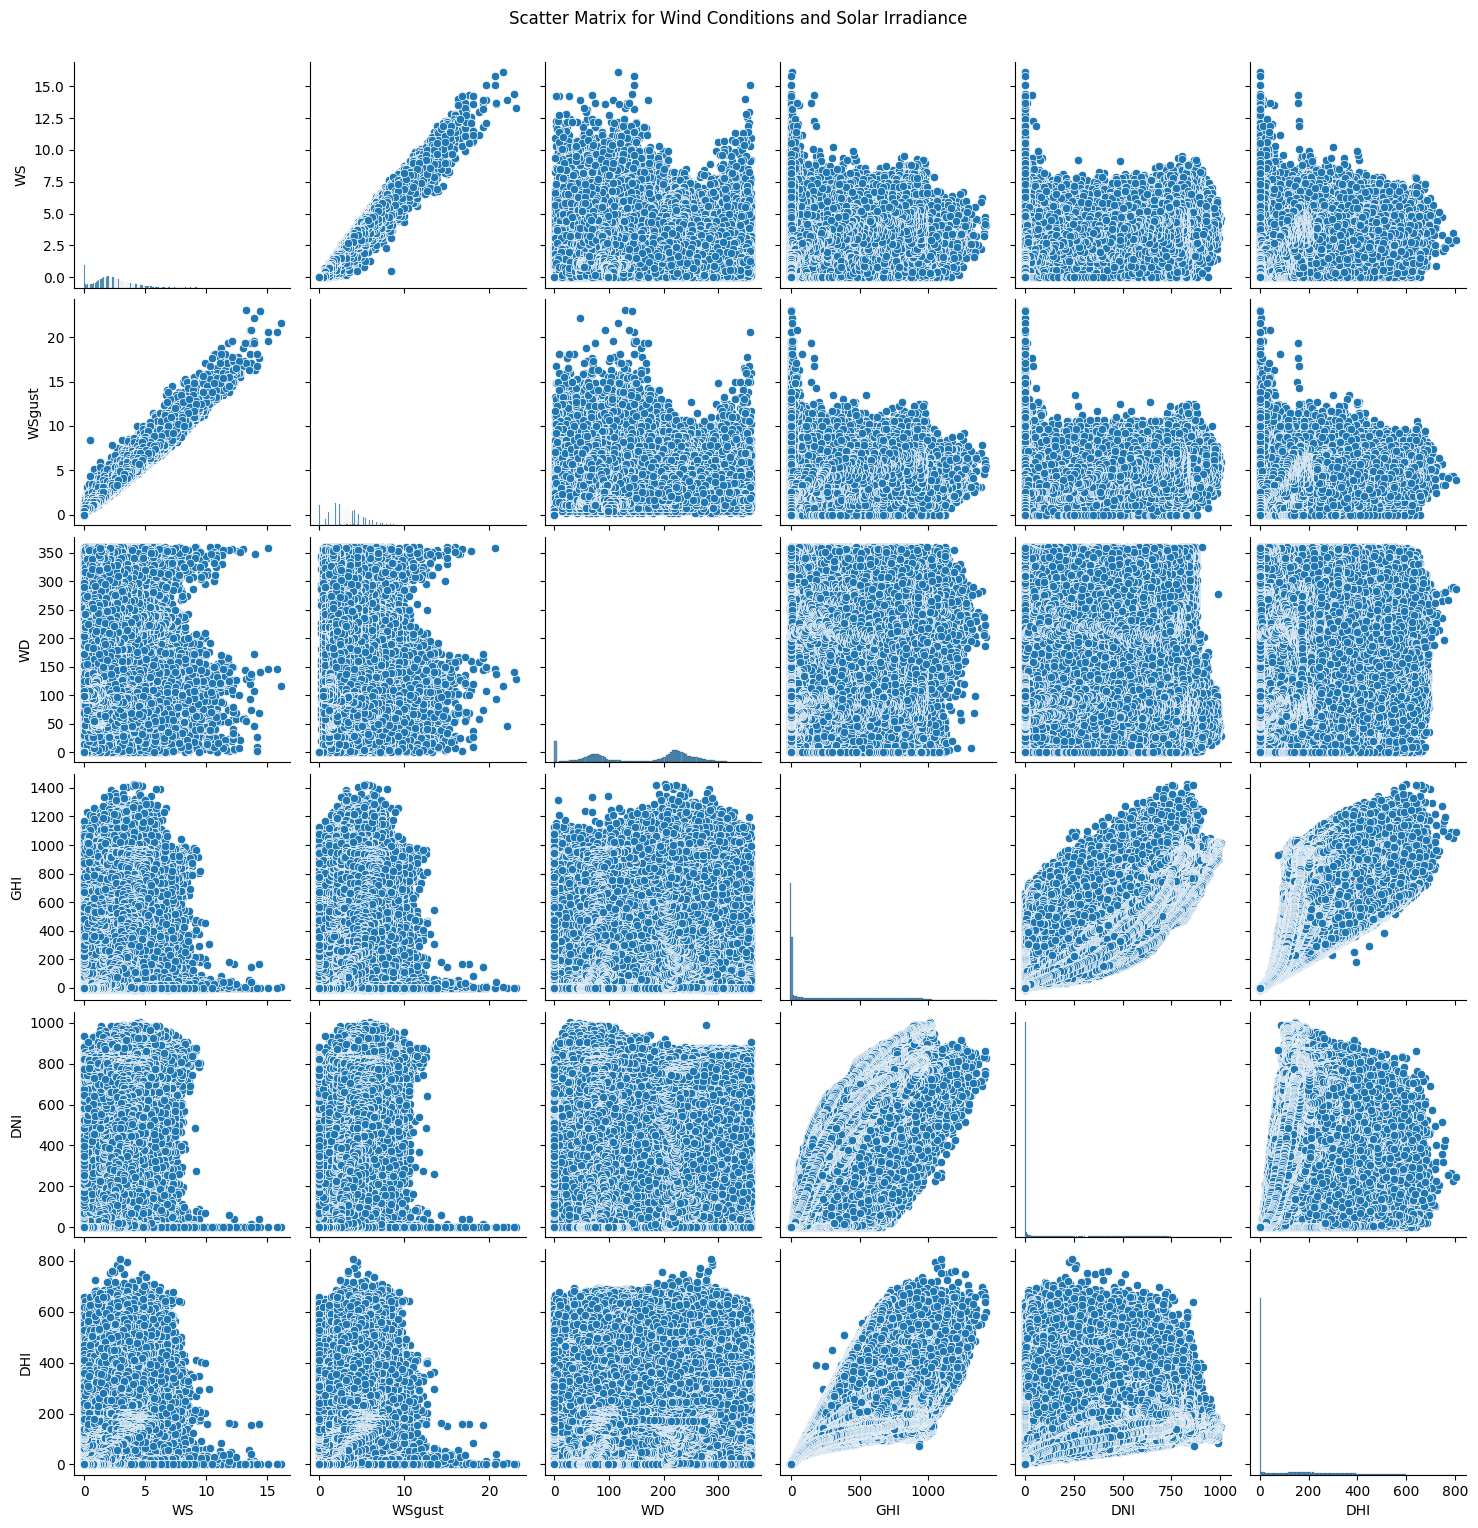

In [10]:
# Plotting scatter matrix (pair plot)
sns.pairplot(df[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']])
plt.suptitle('Scatter Matrix for Wind Conditions and Solar Irradiance', y=1.02)
plt.show()


wind analysis

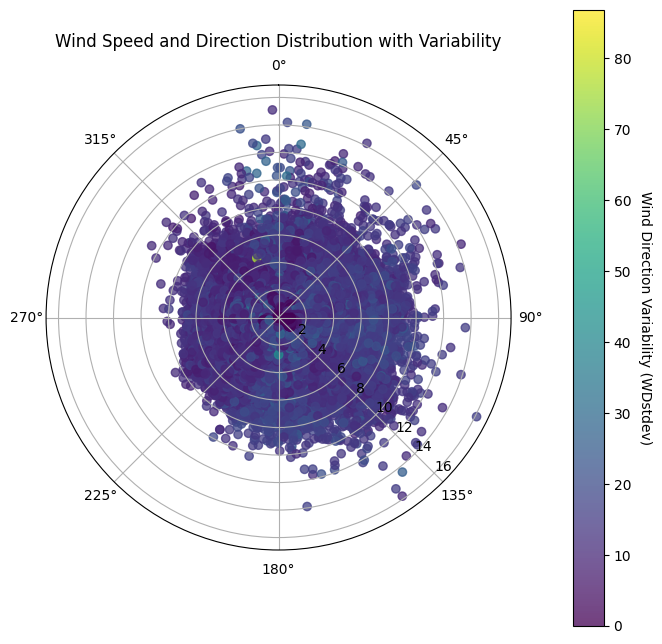

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with columns 'WD' (Wind Direction), 'WS' (Wind Speed), 'WDstdev' (Wind Direction Std Dev)

# Convert wind direction from degrees to radians for polar plot
wind_direction_radians = np.deg2rad(df['WD'])

# Create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Plot wind speed against wind direction
sc = ax.scatter(wind_direction_radians, df['WS'], c=df['WDstdev'], cmap='viridis', alpha=0.75)

# Add a colorbar to represent wind direction variability
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Wind Direction Variability (WDstdev)', rotation=270, labelpad=15)

# Add titles and labels
ax.set_title('Wind Speed and Direction Distribution with Variability', va='bottom')
ax.set_theta_zero_location('N')  # North is up
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_rlabel_position(135)  # Position of radial labels

# Display the plot
plt.show()


tempreture analysis

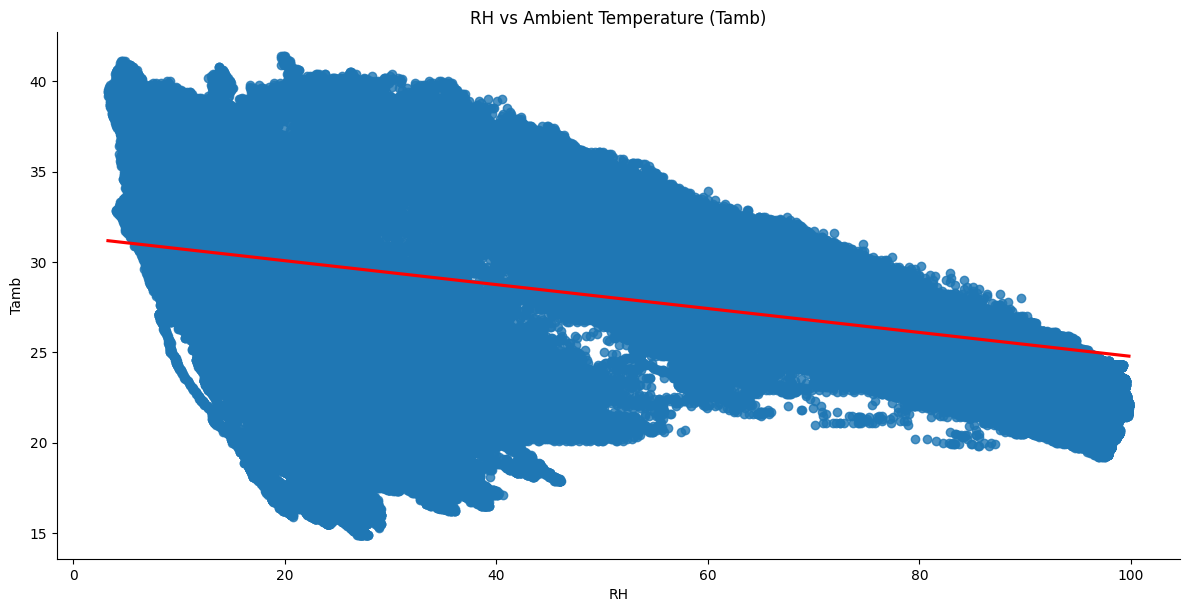

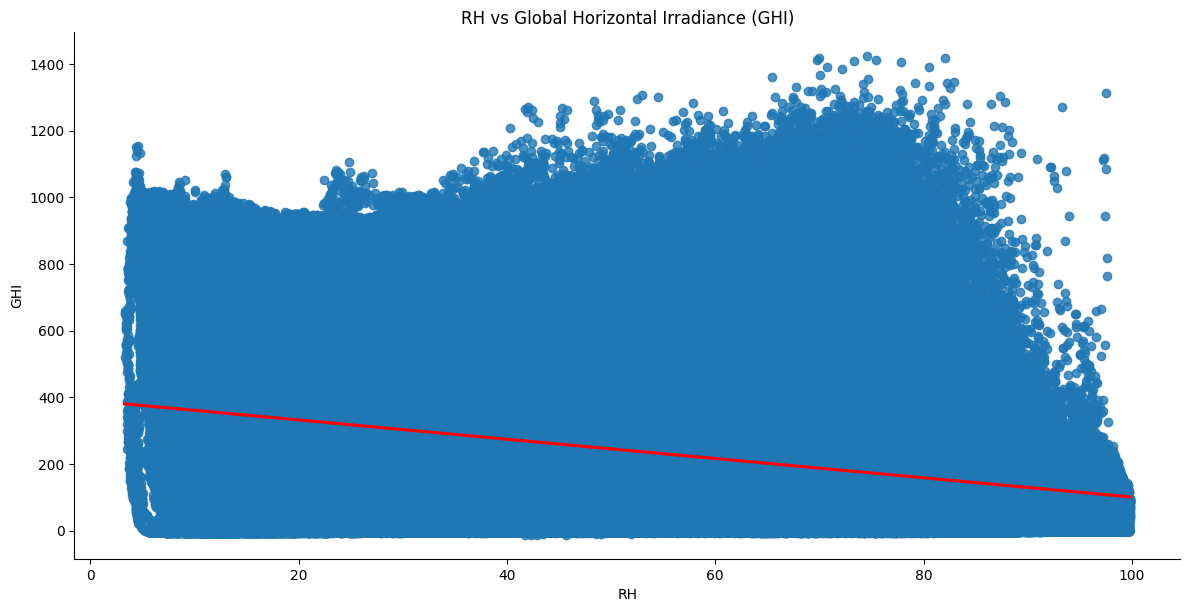

In [12]:
# Scatter plot of RH vs Tamb
sns.lmplot(x='RH', y='Tamb', data=df, aspect=2, height=6, line_kws={'color':'red'})
plt.title('RH vs Ambient Temperature (Tamb)')
plt.show()

# Scatter plot of RH vs GHI
sns.lmplot(x='RH', y='GHI', data=df, aspect=2, height=6, line_kws={'color':'red'})
plt.title('RH vs Global Horizontal Irradiance (GHI)')
plt.show()

tempreture analysis

In [13]:

def data_quality_check(df):
    missing_values = df.isnull().sum()
    negative_values = (df.select_dtypes(include=[np.number]) < 0).sum()
    return missing_values, negative_values

missing_values, negative_values = data_quality_check(df)

print("Missing Values:\n", missing_values)
print("\nNegative Values:\n", negative_values)
missing_values = data.isnull().sum()
print(missing_values)


Missing Values:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Negative Values:
 GHI              257385
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments              0
dtype: int64
Timestamp        0
GHI              0
DNI              0
DHI              

Histograms:

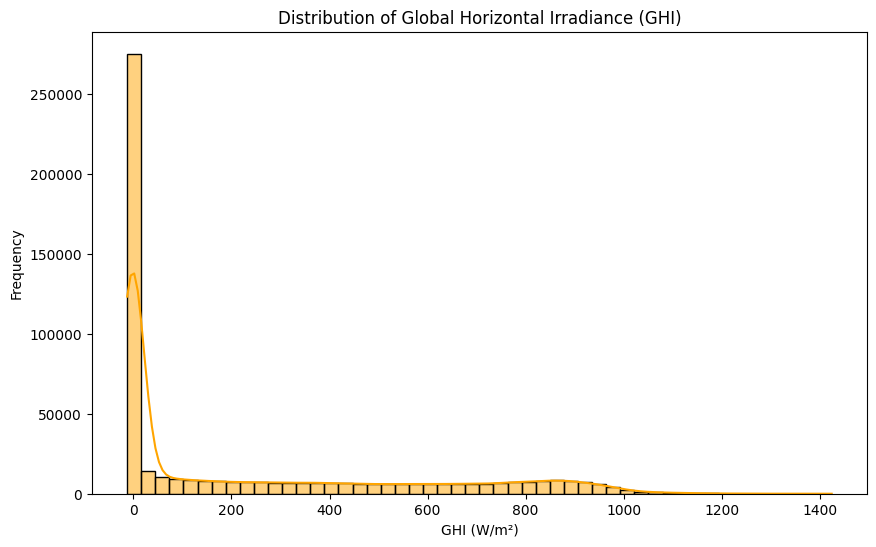

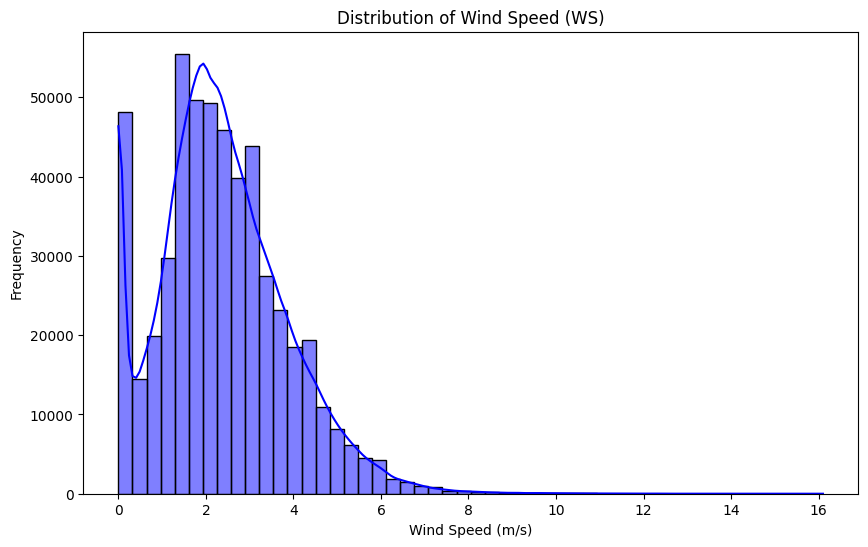

In [14]:
# Histogram for GHI
plt.figure(figsize=(10, 6))
sns.histplot(df['GHI'], bins=50, kde=True, color='orange')
plt.title('Distribution of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Wind Speed (WS)
plt.figure(figsize=(10, 6))
sns.histplot(df['WS'], bins=50, kde=True, color='blue')
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()


Z score

In [15]:
from scipy.stats import zscore

# Calculate Z-scores
df['GHI_zscore'] = zscore(df['GHI'])
df['DNI_zscore'] = zscore(df['DNI'])
df['DHI_zscore'] = zscore(df['DHI'])
df['Tamb_zscore'] = zscore(df['Tamb'])

# Flagging outliers
outliers = df[(df['GHI_zscore'].abs() > 3) | (df['DNI_zscore'].abs() > 3) | (df['DHI_zscore'].abs() > 3) | (df['Tamb_zscore'].abs() > 3)]
print(outliers)


                       GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
Timestamp                                                                 
2021-10-30 11:01:00  934.0  989.8   84.9  977.9  951.0  30.2  64.5  3.3   
2021-11-21 10:53:00  893.0  905.5  138.3  976.6  939.0  34.0  19.1  3.5   
2021-11-21 11:03:00  904.0  906.1  140.7  986.8  949.0  34.4  18.5  3.9   
2021-11-21 11:04:00  905.0  907.7  140.9  988.9  951.0  34.4  18.9  2.8   
2021-11-21 11:05:00  907.0  907.4  142.0  989.9  953.0  34.5  18.3  3.3   
...                    ...    ...    ...    ...    ...   ...   ...  ...   
2022-10-14 11:54:00  709.5   63.7  629.8  703.1  694.9  30.2  66.6  3.5   
2022-10-14 11:55:00  677.8   40.6  621.7  670.1  662.2  30.2  66.7  2.8   
2022-10-14 11:56:00  659.5   29.7  614.9  651.0  643.4  30.3  66.1  4.1   
2022-10-14 11:57:00  660.1   40.7  605.6  653.2  645.6  30.2  66.0  3.7   
2022-10-14 11:58:00  655.8   50.2  591.0  647.5  639.9  30.2  66.2  3.4   

                     WSg

Bubble chart

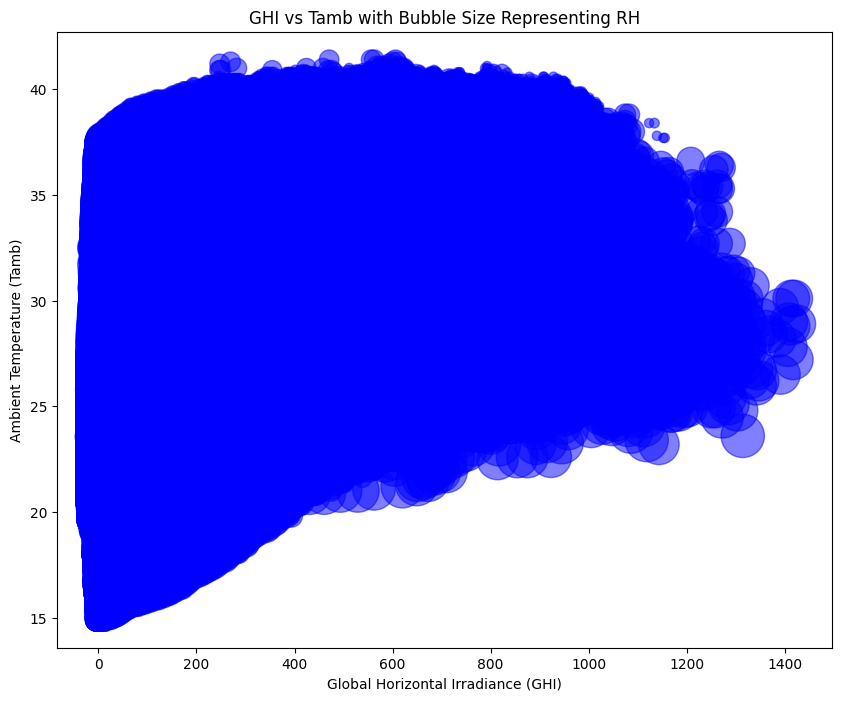

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5, c='blue')
plt.title('GHI vs Tamb with Bubble Size Representing RH')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.show()


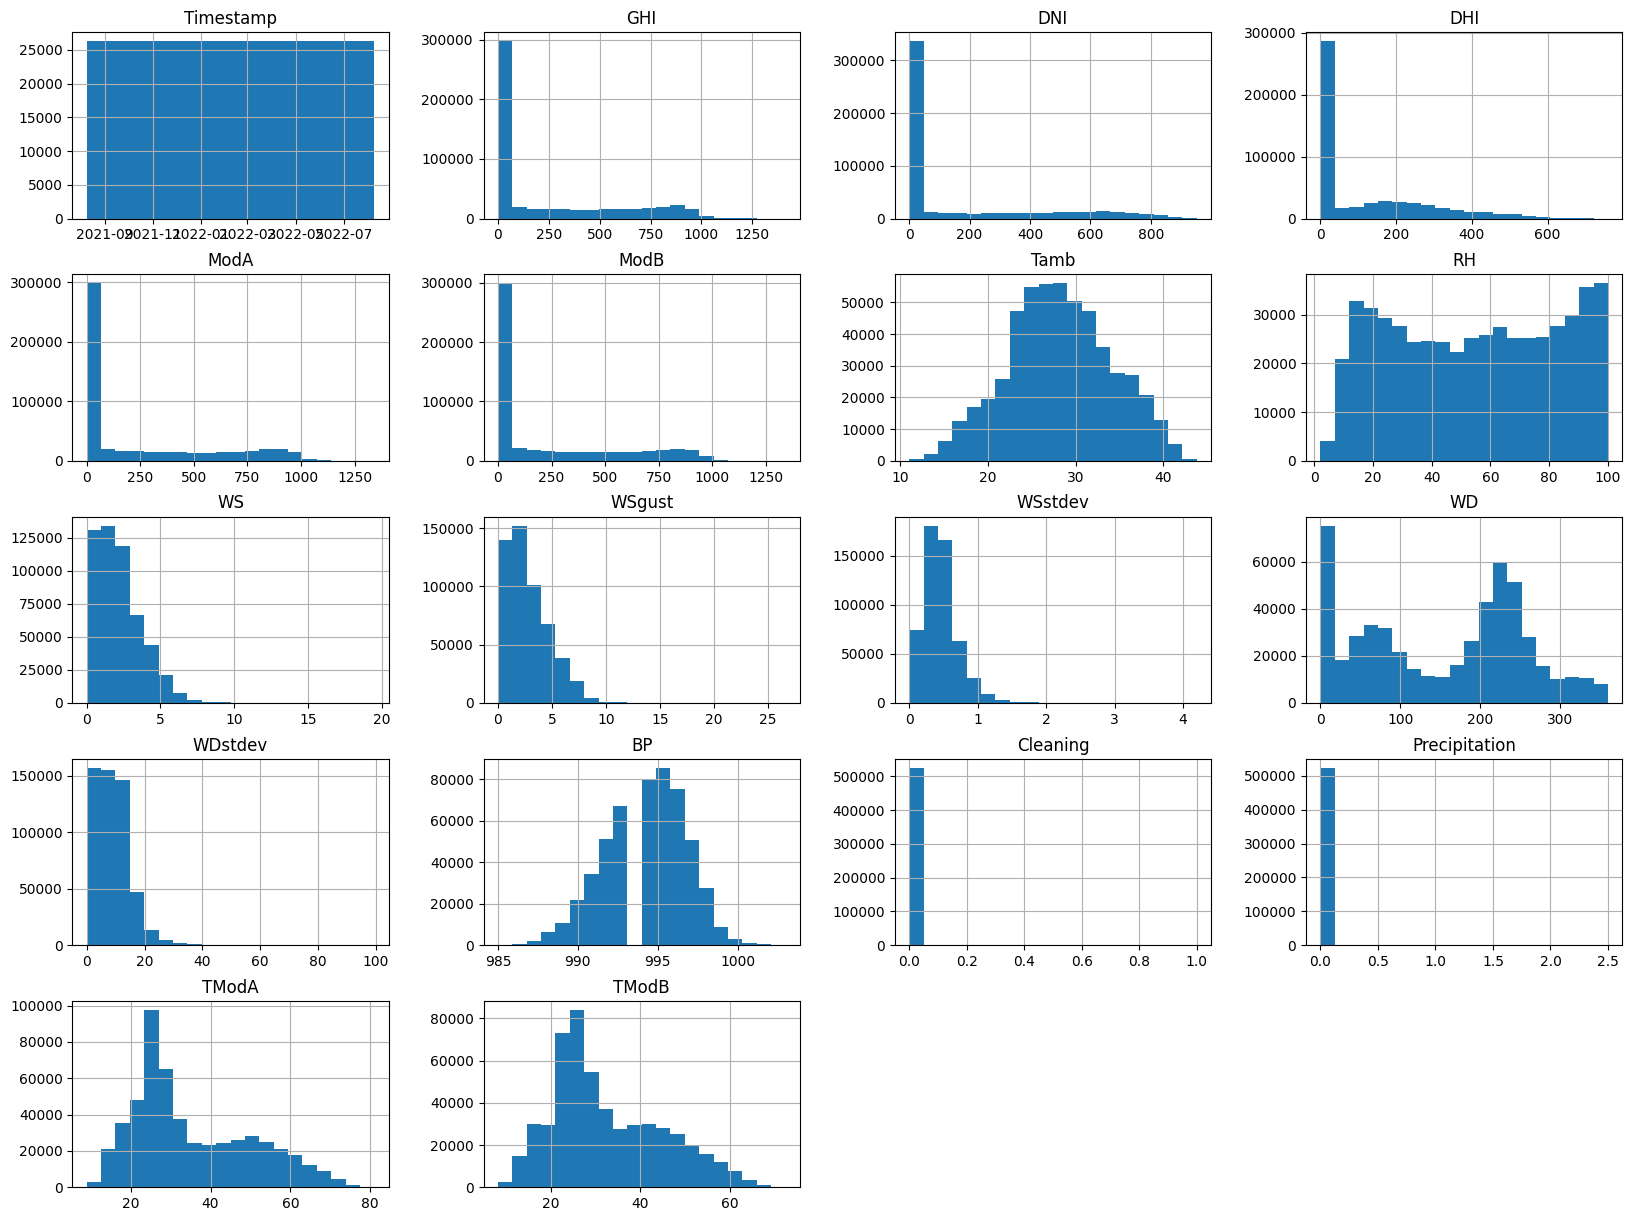

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(bins=20, figsize=(20, 15))
plt.show()


In [18]:
summary_stats = data.describe()
print(summary_stats)


                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     241.958821     167.441866   
min              2021-08-09 00:01:00       0.000000       0.000000   
25%              2021-11-08 06:00:45       0.000000       0.000000   
50%              2022-02-07 12:00:30       1.800000       0.000000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     330.101787     261.547532   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.993033     236.589496     228.883576      28.179683   
min         0.000000       0.000000       0.000000      11.000000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         1.600000    

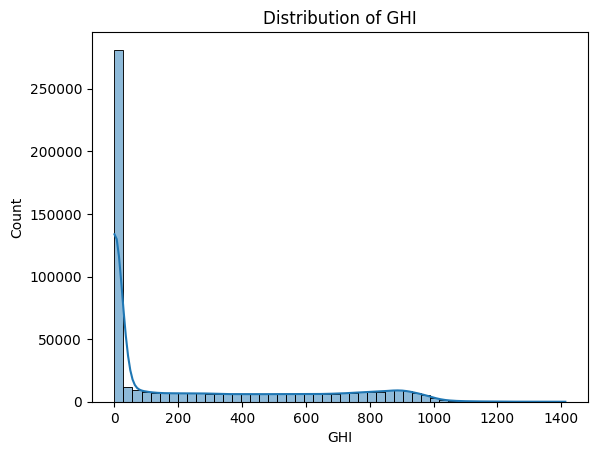

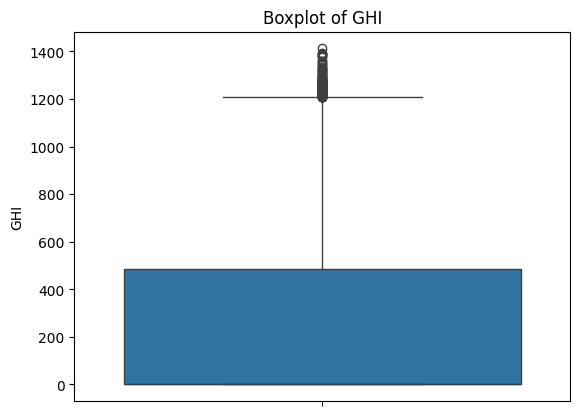

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['GHI'], bins=50, kde=True)
plt.title('Distribution of GHI')
plt.show()

sns.boxplot(data['GHI'])
plt.title('Boxplot of GHI')
plt.show()


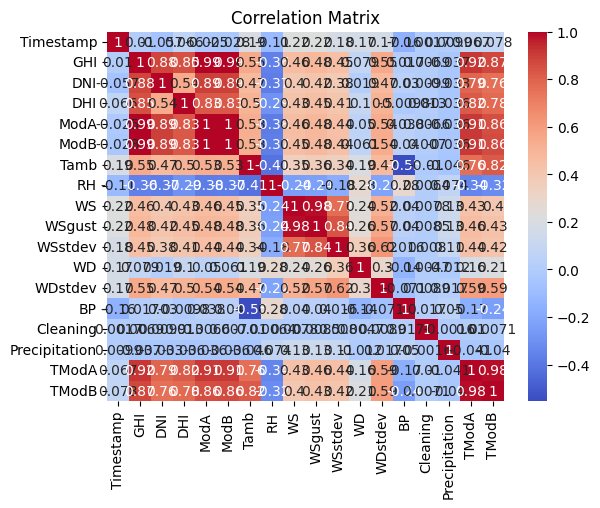

In [20]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


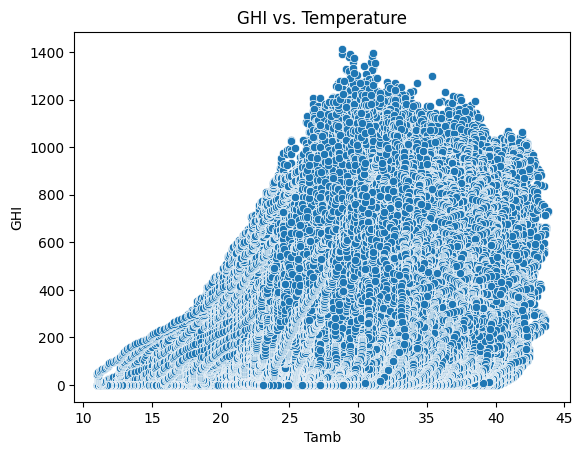

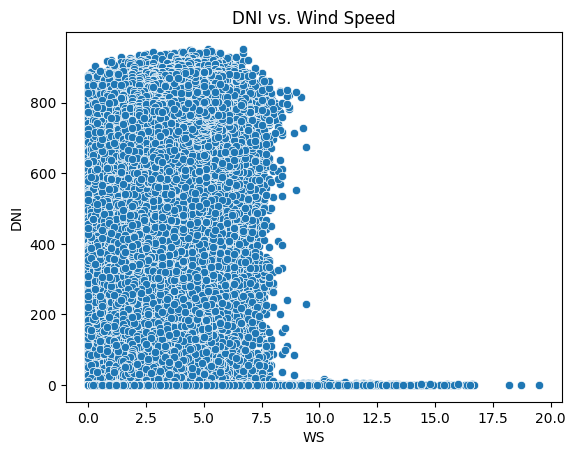

In [21]:
sns.scatterplot(x='Tamb', y='GHI', data=data)
plt.title('GHI vs. Temperature')
plt.show()

sns.scatterplot(x='WS', y='DNI', data=data)
plt.title('DNI vs. Wind Speed')
plt.show()


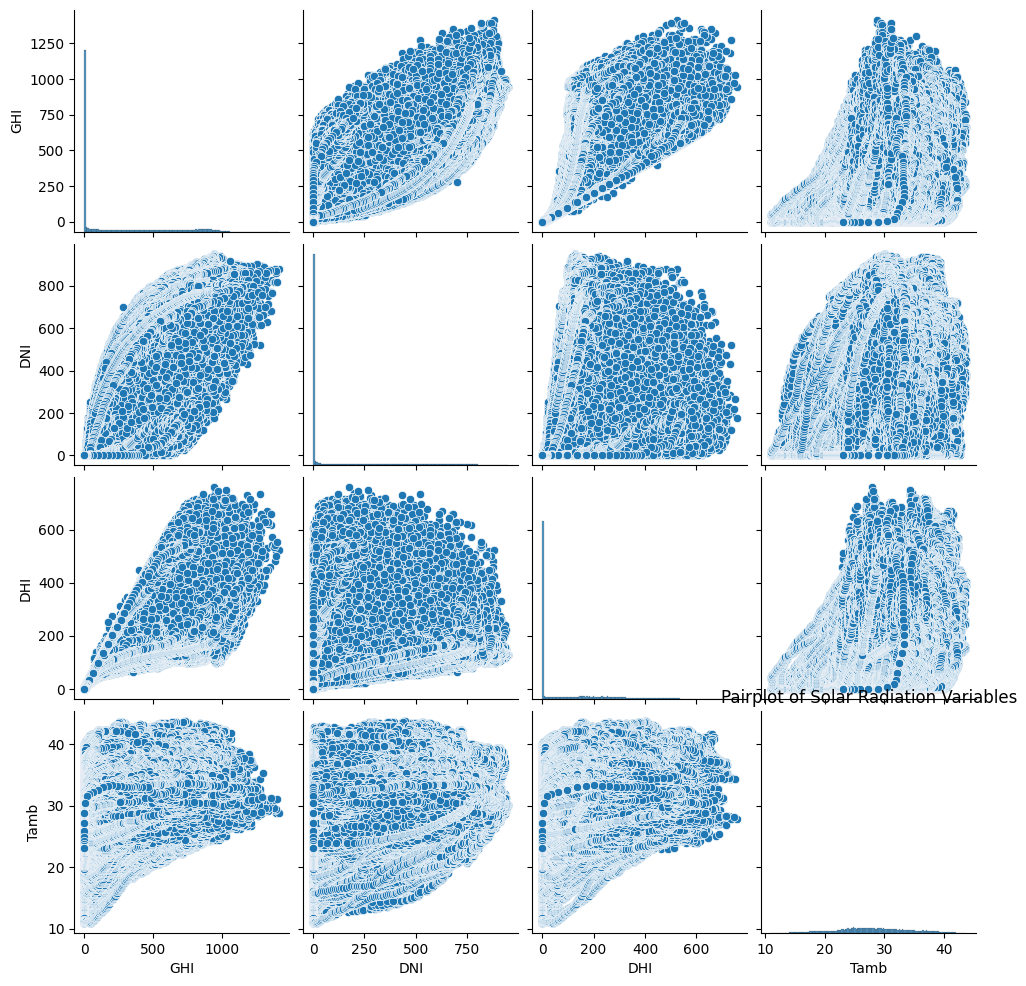

In [22]:
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Pairplot of Solar Radiation Variables')
plt.show()


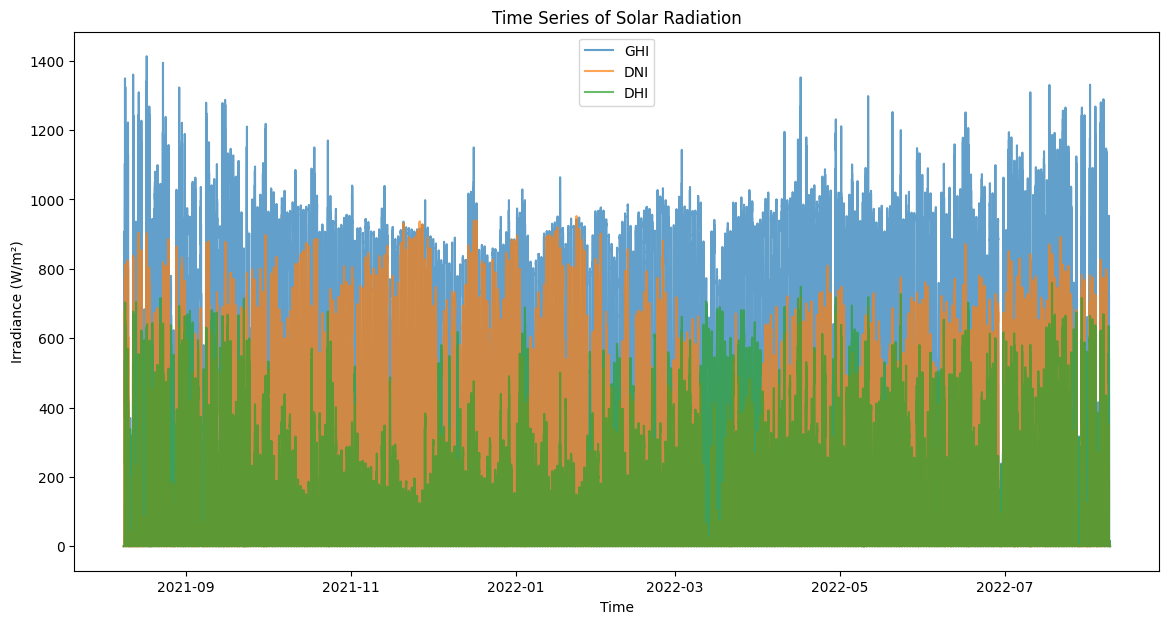

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(data['Timestamp'], data['GHI'], label='GHI', alpha=0.7)
plt.plot(data['Timestamp'], data['DNI'], label='DNI', alpha=0.7)
plt.plot(data['Timestamp'], data['DHI'], label='DHI', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.title('Time Series of Solar Radiation')
plt.legend()
plt.show()
